# Наивный байесовский классификатор

## Теорема Байеса

Теорема Байеса в теории вероятностей позволяет оценить вероятность некоторого события $B$ при условии, что произошло некоторое другое, статистически взаимозависимое с ним, событие $A$. В байесианской терминологии события $A$ называются *причинами* или *гипотезами*, а события $B$ - *событиями* или *следствиями*. Иными словами, теорема Байеса позволяет оценить, какова вероятность того, что наблюдаемое событие $B$ было вызвано причиной $A$.
Такая вероятность называется условной и записывается в виде $P(B \mid A)$. 

Количественно условная вероятность вычисляется через теорему Байеса, которая записывается следующим образом:

$$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}, $$
где 
- $P(A \mid B)$ - апостериорная вероятность, то есть, вероятность того, что наблюдаемое событие $B$ было вызвано причиной $A$
- $P(B \mid A)$ - вероятность того, что причина $A$ приведёт к событию $B$
- $P(A)$ - априорная вероятность причины $A$
- $P(B)$ - полная вероятность наступления события $B$

Сам Байес предлагал использование теоремы для корректировки убеждений, основываясь на обновлённых данных.

Давайте рассмотрим пример с Википедии, чтобы закрепить введённые термины параллелями с реалиями.

## Применение теоремы Байеса

Машина не заводится. Это наблюдаемое событие, $B$. Оценим вероятность того, что это следствие отсутствия бензина в баке, причины $A$. Нужно оценить величины, входящие в формулу теоремы Байеса:
- $P(B \mid A)$ - то есть, вероятность того, что машина не заведётся при условии отсутствия бензина. Очевидно, что численное равна 1.
- $P(A)$ - вероятность отсутсвия бензина. Событие маловероятное, но для удобства оценим в 0,1%
- $P(B)$ - вероятность того, что машина не заведётся. Скажем, что равна 0,5%.

Тогда

$$P(A \mid B) = \frac{100\% \cdot 0.1\%}{0.5\%} = 20\%$$



## Наивность

В задаче классификации при помощи теоремы оценивают $P(C_i \mid F_1,F_2,...,F_n)$, то есть вероятность принадлежности объекта $i$-му классу при условии наблюдения признаков $F_1,F_2,...,F_n$. Запишем формулу:

$$P(C_i \mid F_1,F_2,...,F_n) = \frac{P(F_1,F_2,...,F_n \mid C_i)P(C)}{P(F_1,F_2,...,F_n)}$$

Главная проблема в вычисление члена $P(F_1,F_2,...,F_n \mid C_i)$. Если расписывать его по-честному, предполагая, что признаки взаимозависимы, получится

$$P(F_1,F_2,...,F_n \mid C_i) = P(F_2,...,F_n \mid C_i, F_1)P(F_1 \mid C_i) = P(F_3,...,F_n \mid C_i, F_1, F_2)P(F_1 \mid C_i)P(F_2 \mid C_i, F_1) = ...$$

Наивное предположение заключается в том, что мы считаем причины $F_1,F_2,...,F_n$ взаимонезависимыми. Тогда вероятность $P(F_1,F_2,...,F_n \mid C_i)$ представляется в виде $\prod_{j=1}^{N}P(F_j \mid C_i)$. Формула приобретает вид:

$$P(C_i \mid F_1,F_2,...,F_n) = \frac{P(C)\prod_{j=1}^{N}P(F_j \mid C_i)}{P(F_1,F_2,...,F_n)} = Z\cdot P(C)\prod_{j=1}^{N}P(F_j \mid C_i),$$

поскольку знаменатель не зависит от рассматриваемого класса, его можно заменить константой $\frac{1}{Z}$.

## Оценка параметров

Все параметры модели могут быть аппроксимированы относительными частотами из набора данных обучения. Это оценки максимального правдоподобия вероятностей. Непрерывные свойства, как правило, оцениваются через нормальное распределение. В качестве математического ожидания и дисперсии вычисляются статистики — среднее арифметическое и среднеквадратическое отклонение соответственно.

Если данный класс и значение свойства никогда не встречаются вместе в наборе обучения, тогда оценка, основанная на вероятностях, будет равна нулю. Это проблема, так как при перемножении нулевая оценка приведет к потере информации о других вероятностях. Поэтому предпочтительно проводить небольшие поправки во все оценки вероятностей так, чтобы никакая вероятность не была строго равна нулю. 

## Полиномиальный наивный байесовский классификатор

Наивное допущение полиномиального классификатора - все наблюдаемые признаки распределены в соответствии с простым полиномиальным распределением. Полиномиальное распределение описывает вероятность наблюдения количеств вхождений в несколько категорий, таким образом, полиномиальный наивный байесовский классификатор лучше всего подходит для признаков, отражающих количество или частоту вхождения. Такой классификатор нередко используется при классификации текста, где признаки соответствуют количеству слов или частотам их употребления в классифицируемых документах.

## 20 newsgroup dataset

Для построения наивного байесова классификатора воспользуемся датасетом 20 newsgroup. Он представляет собой сборник сообщений из дискуссий по 20 различным тематикам. Построим классификатор, который сможет различать тематику опираясь на текст.

Датасет содержится в библиотеке `sklearn.datasets`. Взглянем на него:

In [8]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

for name in data.target_names:
    print(name)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


А теперь посмотрим на пример новости:

In [19]:
N = 23
cat = data.target_names[data.target[N]]

print(f'Category: {cat}\n')
print(data.data[N])

Category: comp.os.ms-windows.misc

From: csyphers@uafhp..uark.edu (Chris Syphers)
Subject: Re: ?? DOS font size in windows??
Organization: Kansas State University
Lines: 20
NNTP-Posting-Host: uafhp.uark.edu

ssa@unity.ncsu.edu (S. Alavi) writes:


>	I have an 8514/A card, and I am using windows in 1024x768 mode 
>	(normal 8514/A font, not small).  In the 386 enhanced mode
>	the DOS window font is too small for my 14" monitor. Is there a 
>	way to spacify the font size for the DOS window? You'll have to 
>	excuse me if there is a trivial answer, since I am fairly new to
>	MS Windows world.

>	Thanks.

>	(Please include this message for reference)
>	======  S. Alavi    [ssa@unity.ncsu.edu]  (919)467-7909 (H)  ========
>						  (919)515-8063 (W)
The control box of the Window itself (upper left corner of the window, single
click, am I being too simplistic?) has a font option. The 8 X 12 is about the
biggest one I can use without the characters turning funky. 

Hpoe this helps.



### TD-IDF (не путать с TL;DR)

Чтобы превратить текст во что-то потребное для восприятия необходимо выполнить преобразования из текста в числа. Воспользуемся метрикой TF-IDF. Эта метрика используется для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Векторизатор TF-IDF находится в модуле `sklearn.feature_extraction.text`.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(data.data)
vectorized_data = vectorizer.transform(data.data)
print(f'type(vectorized_data): {type(vectorized_data)}\n')
print(f'vectorized_data: \n{vectorized_data}')

type(vectorized_data): <class 'scipy.sparse.csr.csr_matrix'>

vectorized_data: 
  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (11313, 62696)	0.06213004660468942
  (11313, 60910)	0.34638730

Результатом пре образования оказывается разреженная матрица размерами 11313 х ~100000. Теперь можно обучать классификатор. Его можно найти в библиотеке `sklearn.naive_bayes`

In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

train_data = fetch_20newsgroups(subset='train')
val_data = fetch_20newsgroups(subset='test')

vectorizer = TfidfVectorizer()
vectorizer.fit(train_data.data)

vectorized_train = vectorizer.transform(train_data.data)
vectorized_val = vectorizer.transform(val_data.data)

model = MultinomialNB()
model = model.fit(vectorized_train, train_data.target)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(vectorized_val)
y_true = val_data.target

overall_accuracy = (y_pred == y_true).mean() * 100
category_accuracy = dict()
for number, name in enumerate(val_data.target_names):
    mask = y_true == number
    accuracy = (y_true[mask] == y_pred[mask]).mean() * 100
    category_accuracy[name] = accuracy
    
print(f'Overall accuracy: {overall_accuracy:.4}%\n')

print('Accuracy per class: ')
for category, accuracy in category_accuracy.items():
    print(f'{category}: {accuracy:.4}%')

Overall accuracy: 77.39%

Accuracy per class: 
alt.atheism: 52.04%
comp.graphics: 64.78%
comp.os.ms-windows.misc: 65.48%
comp.sys.ibm.pc.hardware: 77.81%
comp.sys.mac.hardware: 77.4%
comp.windows.x: 75.44%
misc.forsale: 69.49%
rec.autos: 91.92%
rec.motorcycles: 93.22%
rec.sport.baseball: 89.92%
rec.sport.hockey: 96.99%
sci.crypt: 96.72%
sci.electronics: 59.8%
sci.med: 73.74%
sci.space: 89.09%
soc.religion.christian: 98.49%
talk.politics.guns: 93.68%
talk.politics.mideast: 91.49%
talk.politics.misc: 41.61%
talk.religion.misc: 13.94%


Рассмотрим результаты подробнее, с какой из групп обычно путают `talk.religion.misc` и `talk.politics.misc`

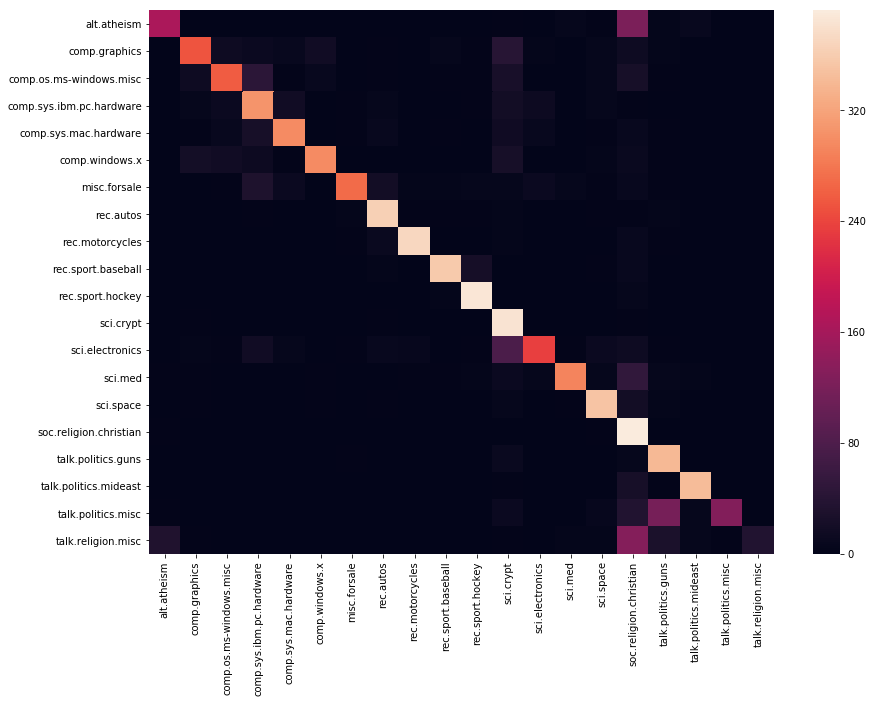

In [72]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, xticklabels=val_data.target_names, yticklabels=val_data.target_names);